This notebook validates our emprically derived parametric function for predicting the mean distance between two Poisson spike trains of the same rate, give duration and cost parameter q. For the fitting of the parameters see the notebook poisson_spkd_fit_parametric.ipynb

In [1]:
# imports
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adds parent directory to path

import numpy as np  
from poisson_utils import generate_poisson_unit, poisson_spkd_estimate   
from tbc_computation import randSpkd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [ ]:
# Test accuracy of parametric estimates of spkd for Poisson spike trains using
# a particular firing rate, cost and duration value
# WARNING: COMPUTATIONALLY EXPENSIVE

FR_val = 55.5
cost_val = 5e-2
duration_val = 10
N_val = 100

# Simulate Poisson spike trains and compute SPKD
spike_trains = generate_poisson_unit(FR_val, duration=duration_val, N=N_val)
result = randSpkd(spike_trains, duration=duration_val, cost=cost_val)
simulated_dist_raw = result['mean']
simulated_dist_sec = simulated_dist_raw / duration_val
simulated_dist_spk = simulated_dist_raw / (FR_val * duration_val)

# Compute parametric estimates
estimated_spkd_spike = poisson_spkd_estimate(FR=FR_val, cost=cost_val, output='per_spike', duration=duration_val)
estimated_spkd_sec = poisson_spkd_estimate(FR=FR_val, cost=cost_val, output='per_sec', duration=duration_val)

# --- comparison ---
print("=== Poisson SPKD Validation ===")
print(f"FR = {FR_val:.1f} spk/s, Cost = {cost_val:.3g}")
print(f"Simulated SPKD per spike: {simulated_dist_spk:.4f}")
print(f"Estimated  SPKD per spike: {estimated_spkd_spike:.4f}")
print()
print(f"Simulated SPKD per second: {simulated_dist_sec:.4f}")
print(f"Estimated  SPKD per second: {estimated_spkd_sec:.4f}")


=== Poisson SPKD Validation ===
FR = 55.5 spk/s, Cost = 0.05
Simulated SPKD per spike: 0.0513
Estimated  SPKD per spike: 0.1544

Simulated SPKD per second: 2.8447
Estimated  SPKD per second: 8.5713


NOTE the result above is wrong so this actually shows the parametric function has an error !! Consider the possibility that the function was only fit for duration = 1s?


In [5]:
# retest with 1s duration
FR_val = 55.5
cost_val = 5e-2
duration_val = 1
N_val = 500

# Simulate Poisson spike trains and compute SPKD
spike_trains = generate_poisson_unit(FR_val, duration=duration_val, N=N_val)
result = randSpkd(spike_trains, duration=duration_val, cost=cost_val)
simulated_dist_raw = result['mean']
simulated_dist_sec = simulated_dist_raw / duration_val
simulated_dist_spk = simulated_dist_raw / (FR_val * duration_val)

# Compute parametric estimates
estimated_spkd_spike = poisson_spkd_estimate(FR=FR_val, cost=cost_val, output='per_spike', duration=duration_val)
estimated_spkd_sec = poisson_spkd_estimate(FR=FR_val, cost=cost_val, output='per_sec', duration=duration_val)

# --- comparison ---
print("=== Poisson SPKD Validation ===")
print(f"FR = {FR_val:.1f} spk/s, Cost = {cost_val:.3g}")
print(f"Simulated SPKD per spike: {simulated_dist_spk:.4f}")
print(f"Estimated  SPKD per spike: {estimated_spkd_spike:.4f}")
print()
print(f"Simulated SPKD per second: {simulated_dist_sec:.4f}")
print(f"Estimated  SPKD per second: {estimated_spkd_sec:.4f}")

=== Poisson SPKD Validation ===
FR = 55.5 spk/s, Cost = 0.05
Simulated SPKD per spike: 0.1464
Estimated  SPKD per spike: 0.1544

Simulated SPKD per second: 8.1254
Estimated  SPKD per second: 8.5713


The estimate (above) is closer, but still not all that accurate, when duration =1s is used, even with N=500 sampling

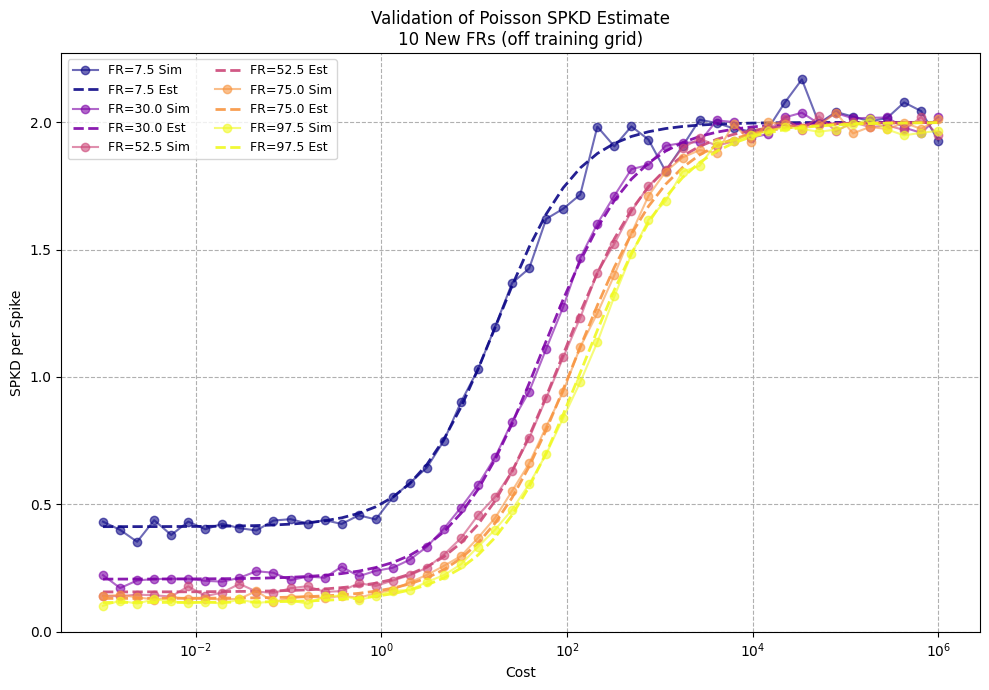

In [ ]:
# Test parametric function using new FR values (off the training grid)
FR_vals = np.linspace(5, 95, 5) + 2.5  # [7.5, 17.5, ..., 97.5]
cost_sweep = np.logspace(-3, 6, 50)

duration_val = 1
N_val = 100

# Plot setup
plt.figure(figsize=(10, 7))
plasma = plt.get_cmap('plasma')
colors = plt.cm.plasma(np.linspace(0, 1, len(FR_vals)))

# Loop over FRs
for idx, FR_val in enumerate(FR_vals):
    sim_spkd_spike = []
    est_spkd_spike = []

    for cost in cost_sweep:
        # Simulate Poisson spike trains
        spike_trains = generate_poisson_unit(FR_val, duration=duration_val, N=N_val)
        result = randSpkd(spike_trains, duration=duration_val, cost=cost)
        dist_spk = result['mean'] / (FR_val * duration_val)
        sim_spkd_spike.append(dist_spk)

        # Estimate using logistic model
        est = poisson_spkd_estimate(FR=FR_val, cost=cost, output='per_spike',duration=duration_val)
        est_spkd_spike.append(est)

    # Convert to arrays
    sim_spkd_spike = np.array(sim_spkd_spike)
    est_spkd_spike = np.array(est_spkd_spike)

    # Plot both
    plt.plot(cost_sweep, sim_spkd_spike, marker='o', linestyle='-', color=colors[idx], alpha=0.6,
             label=f'FR={FR_val:.1f} Sim')
    plt.plot(cost_sweep, est_spkd_spike, linestyle='--', color=colors[idx], linewidth=2, alpha=0.9,
             label=f'FR={FR_val:.1f} Est')

# Plot settings
plt.xscale('log')
plt.xlabel('Cost')
plt.ylabel('SPKD per Spike')
plt.title('Validation of Poisson SPKD Estimate\n10 New FRs (off training grid)')
plt.legend(ncol=2, fontsize=9)
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig('spkd_poisson_multi_fr_validation.png')
plt.show()


In [7]:

    # Plot both
    plt.plot(cost_sweep, sim_spkd_spike, marker='o', linestyle='-', color=colors[idx], alpha=0.6,
             label=f'FR={FR_val:.1f} Sim')
    plt.plot(cost_sweep, est_spkd_spike, linestyle='--', color=colors[idx], linewidth=2, alpha=0.9,
             label=f'FR={FR_val:.1f} Est')

# Plot settings
plt.xscale('log')
plt.xlabel('Cost')
plt.ylabel('SPKD per Spike')
plt.title('Validation of Poisson SPKD Estimate\n10 New FRs (off training grid)')
plt.legend(ncol=2, fontsize=9)
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig('spkd_poisson_multi_fr_validation.png')
plt.show()


IndentationError: unexpected indent (2865385745.py, line 2)